In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib as mpl

import Census as Census
import tjy_udf as tjy
mpl.rc_file('tjy.mplstyle')

# Import Qualtrics CSV

In [2]:
gacen = Census.Census('C:/Users/takas/OneDrive/Desktop/2025 GA Financial Census_May 15, 2025_21.34.csv', datarange=(17,None))

Initialization completed.
Data recorded
	from column R: 
		"What division is your program in? - Selected Choice"
	to column BS: 
		"If you would like to provide more information on accessibility, please do so here."
362 responses.
54 questions asked.


# Background

In [3]:
bg = gacen.section((0,6), gacen.data_df)
bg.show_qlist()

Initialization completed.
Data recorded
	from column R: 
		"What division is your program in? - Selected Choice"
	to column W: 
		"What is your degree program?"
362 responses.
6 questions asked.
	1. What division is your program in? - Selected Choice
 	2. What division is your program in? - Other (please specify) - Text
 	3. Which department are you in? - Selected Choice
 	4. Which department are you in? - Other (please specify) - Text
 	5. Please specify which department you are in
 	6. What is your degree program?



In [4]:
to_pop = (bg.qlist[1], bg.qlist[3], bg.qlist[4])
for i in to_pop:
    bg.pop_other(i)
    
print('\nAfter processing:')
bg.show_qlist()

Popping Q2 (column S): 
	What division is your program in? - Other (please specify) - Text
	Responses: ['Quantitative bio sciences', 'Biophysics', 'QB3']
Popping Q4 (column U): 
	Which department are you in? - Other (please specify) - Text
	Responses: None
Popping Q5 (column V): 
	Please specify which department you are in
	Responses: None

After processing:
	1. What division is your program in? - Selected Choice
 	2. Which department are you in? - Selected Choice
 	3. What is your degree program?



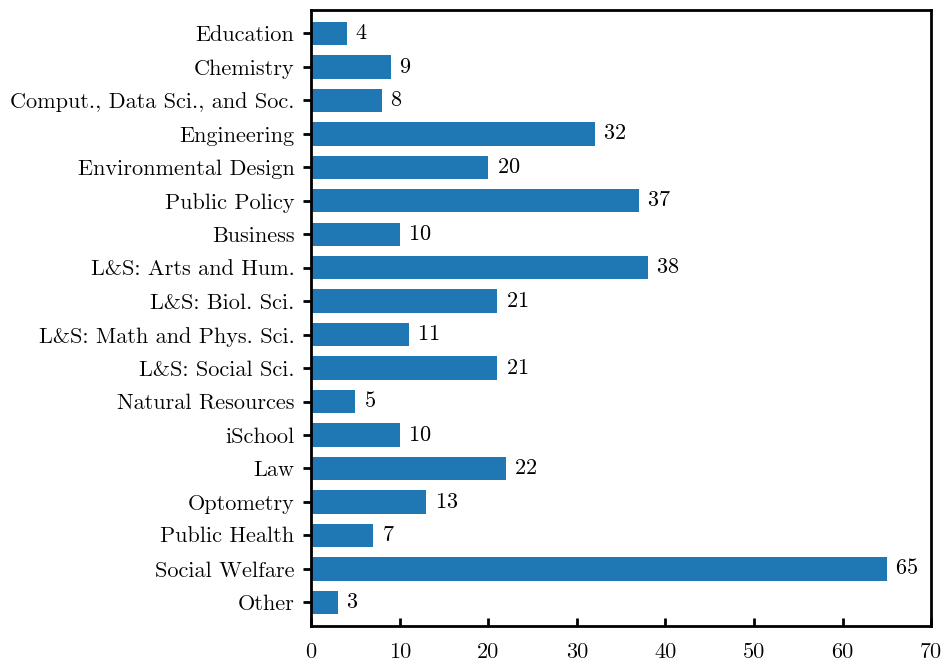

In [5]:
# Division
data    = bg.count_single_choice(bg.qlist[0])
data_al = Census.alias_labels(data,
            als = {'School of Information': 'iSchool', 'College of Chemistry': 'Chemistry', 'School of Public Health': 'Public Health',
            'Letters and Science - Mathematical and Physical Sciences': 'L&S: Math and Phys. Sci.', 'School of Law': 'Law', 
            'Letters and Science - Arts and Humanities': 'L&S: Arts and Hum.', 'School of Optometry': 'Optometry', 'College of Engineering': 'Engineering',
            'College of Environmental Design': 'Environmental Design', 'School of Social Welfare': 'Social Welfare', 'Goldman School of Public Policy': 'Public Policy',
            'Letters and Science - Biological Sciences': 'L&S: Biol. Sci.', 'Berkeley School of Education': 'Education', 'Letters and Science - Social Sciences': 'L&S: Social Sci.',
            'Haas School of Business': 'Business', 'Rausser College of Natural Resources': 'Natural Resources', 'College of Computing, Data Science, and Society': 'Comput., Data Sci., and Soc.', 
            'Other (please specify)': 'Other'})
data_al = Census.move_to_bot(data_al, data_al.iloc[:,0]=='Other (please specify)')

fig, ax = plt.subplots(figsize=(8,8))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.7)
ax.bar_label(bar_container, padding=6, fontsize=16, fmt=r'$%d$')
ax.set_xlim(0,70)
plt.margins(y=0.02)
tjy.ticks()

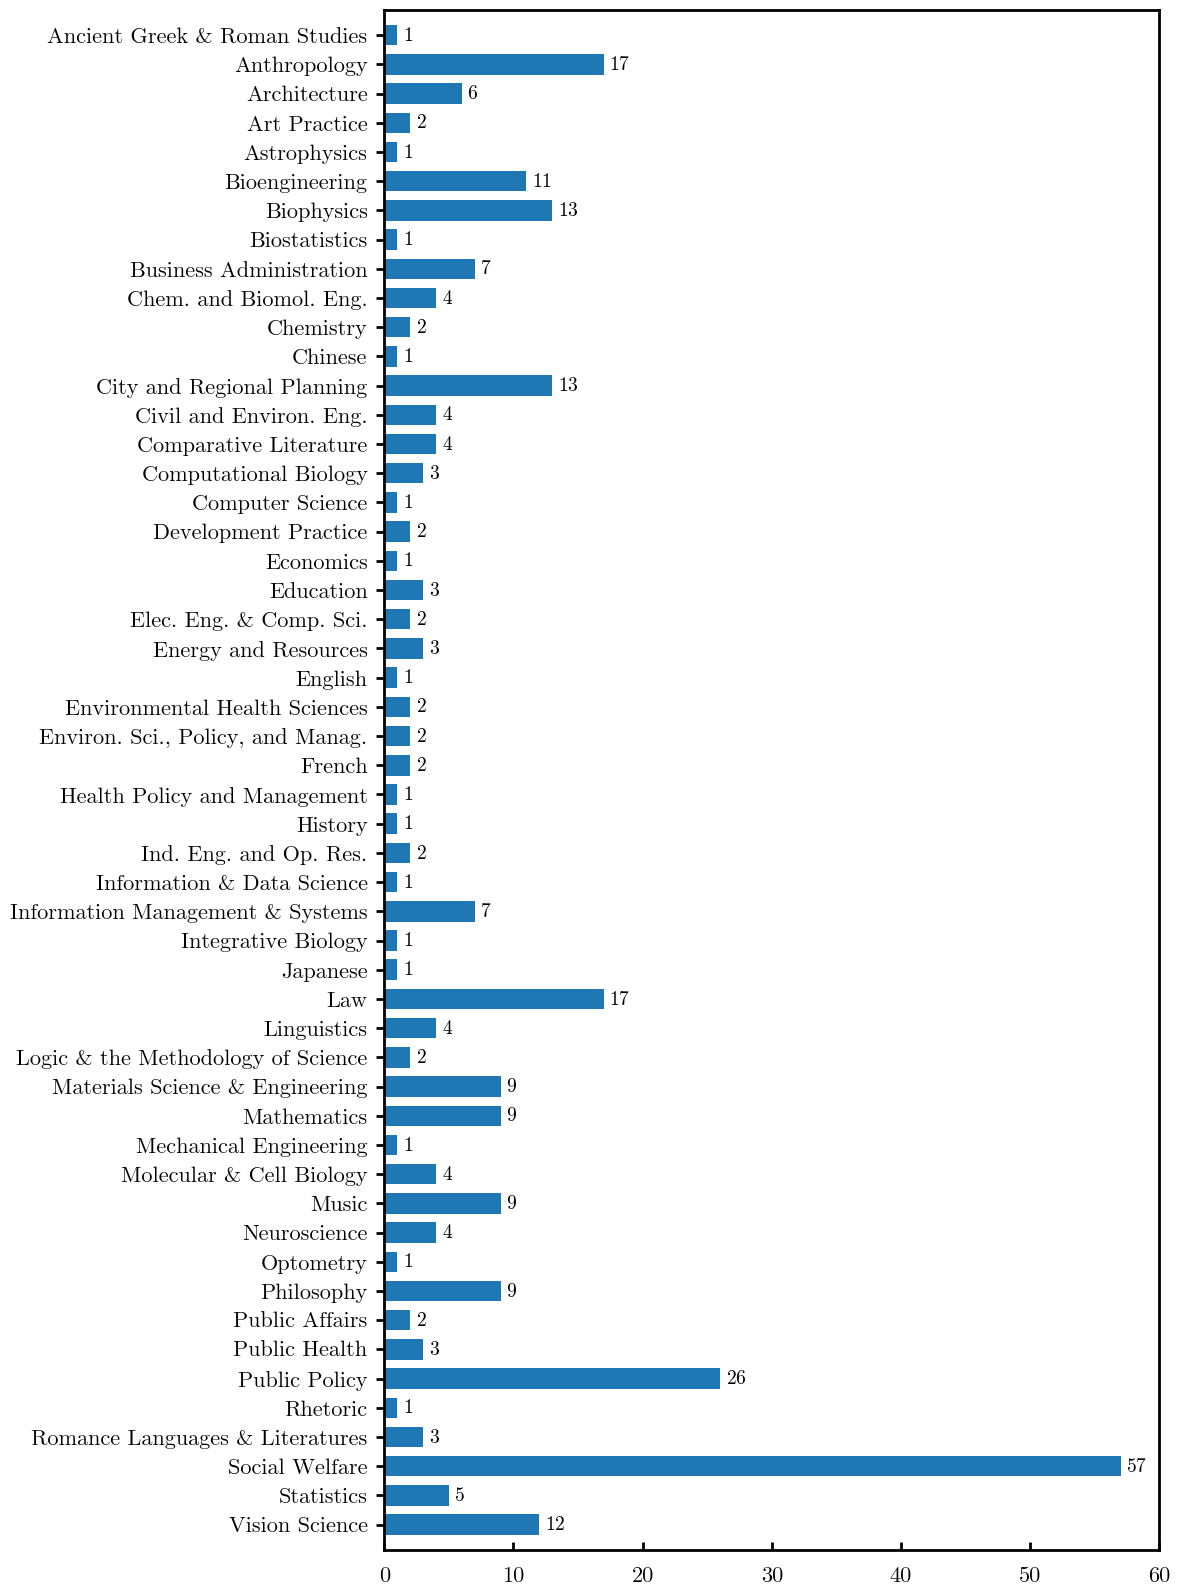

In [6]:
# Department
data    = bg.count_single_choice(bg.qlist[1])
data_al = Census.alias_labels(data,
            als = {'Chemical and Biomolecular Engineering': 'Chem. and Biomol. Eng.', 'Civil and Environmental Engineering': 'Civil and Environ. Eng.', 
             'Electrical Engineering & Computer Sciences': 'Elec. Eng. & Comp. Sci.', 'Environmental Science, Policy, and Management': 'Environ. Sci., Policy, and Manag.',
            'Industrial Engineering and Operations Research': 'Ind. Eng. and Op. Res.'})

fig, ax = plt.subplots(figsize=(10,20))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.7, align='center')
ax.bar_label(bar_container, padding=4, fontsize=14, fmt=r'$%d$')
ax.set_xlim(0,60)
plt.margins(y=0.01)
tjy.ticks()

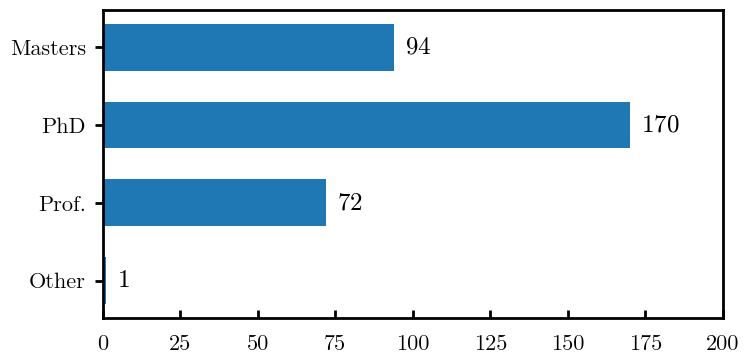

In [7]:
# Degree
data    = bg.count_single_choice(bg.qlist[2])
data_al = Census.alias_labels(data, als={'Professional degree (JD, MPP, MPA, MBA, MPH, etc)': 'Prof.'})
data_al = Census.move_to_bot(data_al, data_al.iloc[:,0]=='Other')

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,200)
plt.margins(y=0.05)
tjy.ticks()

# Financial + Basic Needs

In [8]:
fbn = gacen.section((6,36), gacen.data_df)
# fbn.show_qlist()

Initialization completed.
Data recorded
	from column X: 
		"How do you fund your graduate studies? - Selected Choice"
	to column BA: 
		"If you would like to provide more information on your finances + basic needs, please do so here."
362 responses.
30 questions asked.


In [9]:
to_pop = (fbn.qlist[1], fbn.qlist[8], fbn.qlist[20], fbn.qlist[26])
for i in to_pop:
    fbn.pop_other(i)
    print()
    
print('\nAfter processing:')
fbn.show_qlist()

Popping Q2 (column Y): 
	How do you fund your graduate studies? - Other (please specify) - Text
	Responses: ['Family support ', 'GI Bill ', 'NSF Fellowship', 'Family help', 'VA Benefits', 'NIH Grant', 'CalSWEC program (before it died)', 'CA Department of Rehabilitation is paying for my degree', 'Personal loans from family members', 'Fellowships', 'Department fellowship', 'DCF', 'Internship', 'Financial aid, grants, fellowships, a little parent help, and prayers', 'savings', 'Fellowship', 'Sharing expenses with a partner who works in tech', 'PhD stipend', 'family support ', 'GA ', 'Research Associate', 'VA Benefits', 'California Dept of Rehabilitation', 'Work Study', 'Department of Rehabilitation ', 'California Department of Rehabilitation ', 'Summer non-university work']

Popping Q9 (column AF): 
	What were the most important factors in deciding whether to live in graduate student housing? - Other (please specify) - Text
	Responses: ['Not having a landlord who might be difficult ', 'Pe

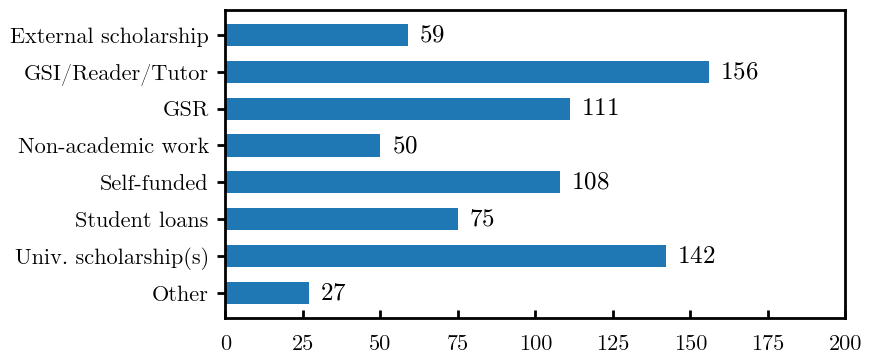

In [10]:
# Funding
data = fbn.count_multi_choice(fbn.qlist[0])
data_al = Census.alias_labels(data, als={' Other (please specify)': 'Other', 'University scholarship(s)': 'Univ. scholarship(s)'})
data_al = Census.move_to_bot(data_al, data.iloc[:,0]==' Other (please specify)')

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,200)
plt.margins(y=0.05)
tjy.ticks()

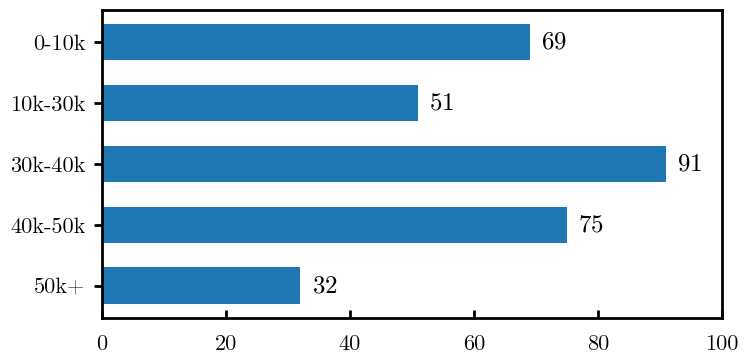

In [11]:
# Income
data = fbn.count_single_choice(fbn.qlist[1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,100)
plt.margins(y=0.05)
tjy.ticks()

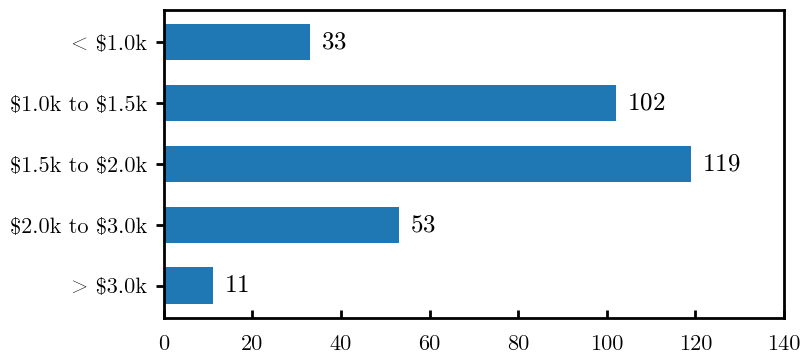

In [12]:
# Rent
data = fbn.count_single_choice(fbn.qlist[2])
data_al = Census.alias_labels(data, als={'0-1k': '< \$1.0k', '1k-1.5k':'\$1.0k to \$1.5k', '1.5k-2k':'\$1.5k to \$2.0k',
                                        '2k-3k':'\$2.0k to \$3.0k', '3k+':'> $3.0k'})
data_al = data_al.reindex([0,2,1,3,4])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,140)
plt.margins(y=0.05)
tjy.ticks()

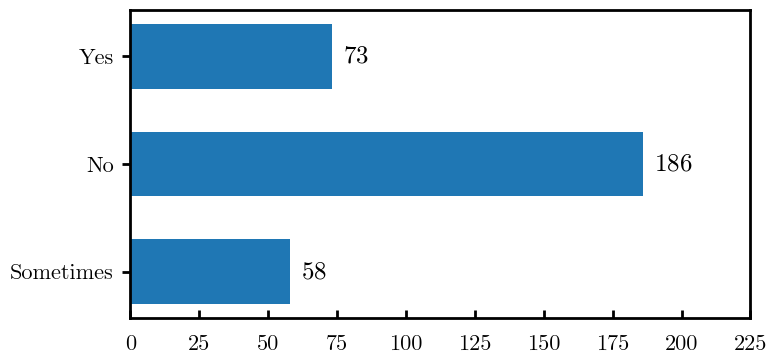

In [13]:
# Rent difficulty
data = fbn.count_single_choice(fbn.qlist[3], sort=False)

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels, data.counts, height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,225)
plt.margins(y=0.05)
tjy.ticks()

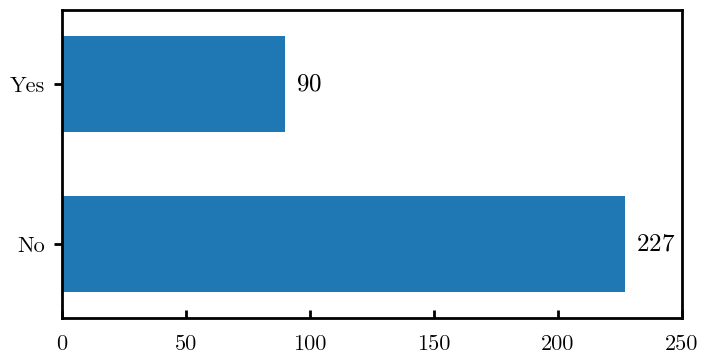

In [14]:
# Housing difficulty
data = fbn.count_single_choice(fbn.qlist[4])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels, data.counts, height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,250)
plt.margins(y=0.10)
tjy.ticks()

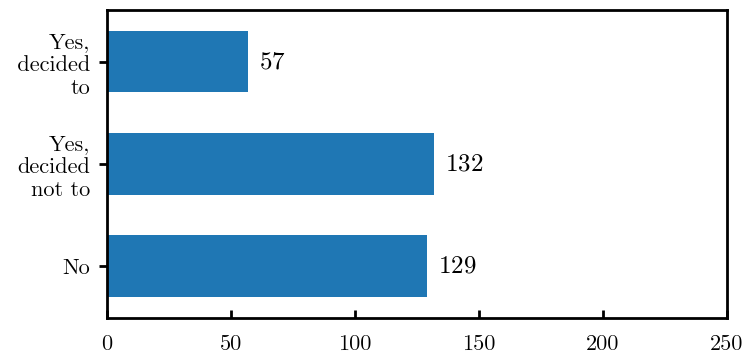

In [15]:
# Consider grad housing
data = fbn.count_single_choice(fbn.qlist[5])
data = Census.move_to_bot(data, data.iloc[:,0]=='No')
data_al = Census.alias_labels(data, als={'Yes, and decided to': 'Yes,\n decided\nto', 'Yes, but decided not to': 'Yes,\ndecided\nnot to'})

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,250)
plt.margins(y=0.08)
tjy.ticks()

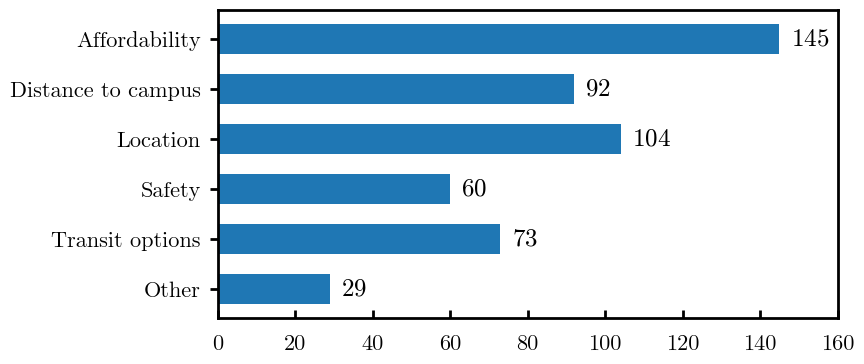

In [16]:
# Factors grad housing
data = fbn.count_multi_choice(fbn.qlist[6])
data = Census.move_to_bot(data, data.iloc[:,0]=='Other (please specify)')
data_al = Census.alias_labels(data, als={'Other (please specify)': 'Other'})

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,160)
plt.margins(y=0.05)
tjy.ticks()

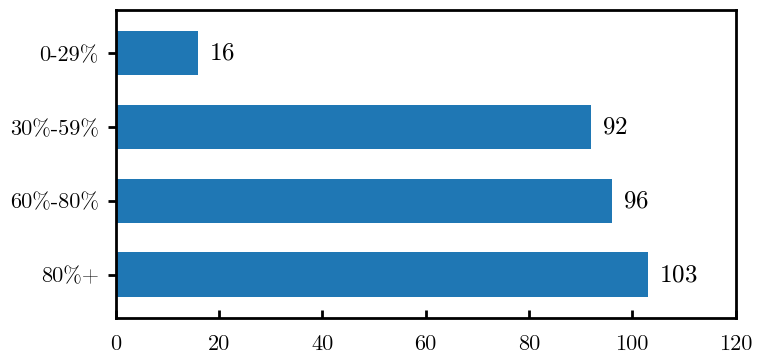

In [17]:
# Income basic needs percent
data = fbn.count_single_choice(fbn.qlist[7])
data_al = Census.alias_labels(data, als={'80% or more': '80%+'})

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,120)
plt.margins(y=0.08)
tjy.ticks()

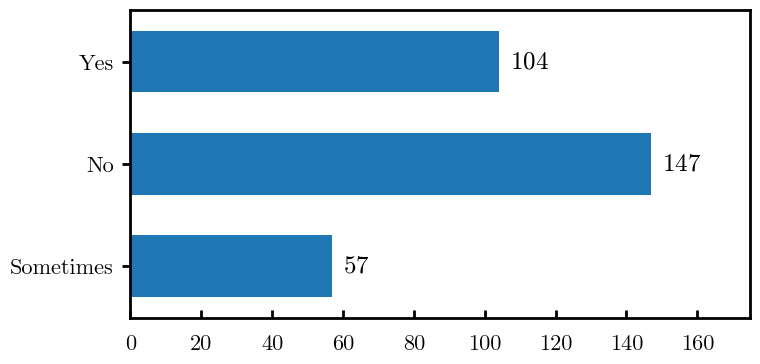

In [18]:
# Family support
data = fbn.count_single_choice(fbn.qlist[8],sort=True)
data = data.reindex(index=[2,0,1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,175)
plt.margins(y=0.08)
tjy.ticks()

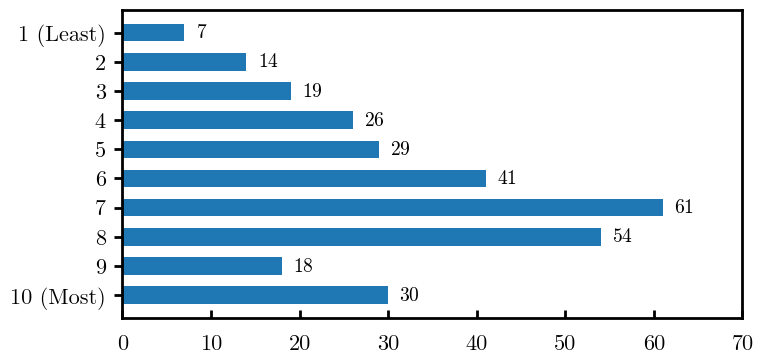

In [19]:
# Financial stress, rated
data = fbn.count_single_choice(fbn.qlist[9],sort=True)
data_al = Census.alias_labels(data, als={'1': '1 (Least)', '10': '10 (Most)'})
data_al = data_al.reindex(index=[0,2,3,4,5,6,7,8,9,1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=14, fmt=r'$%d$')
ax.set_xlim(0,70)
plt.margins(y=0.05)
tjy.ticks()

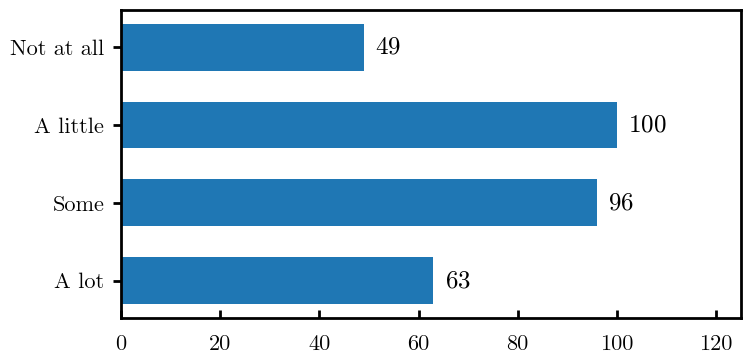

In [20]:
# Financial stress, affect
data = fbn.count_single_choice(fbn.qlist[10],sort=True)
data = data.reindex(index=[2,0,3,1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,125)
plt.margins(y=0.05)
tjy.ticks()

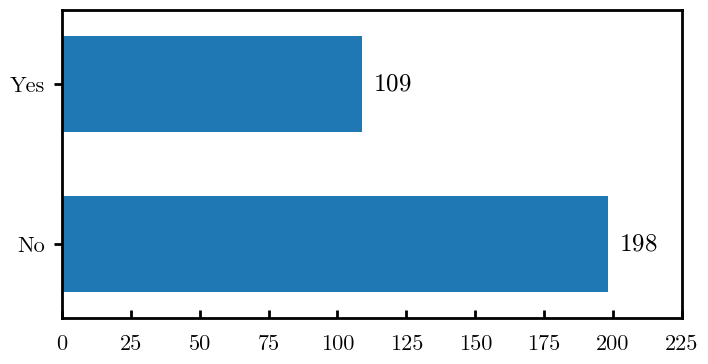

In [21]:
# Student loans
data = fbn.count_single_choice(fbn.qlist[11], sort=False)

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,225)
plt.margins(y=0.10)
tjy.ticks()

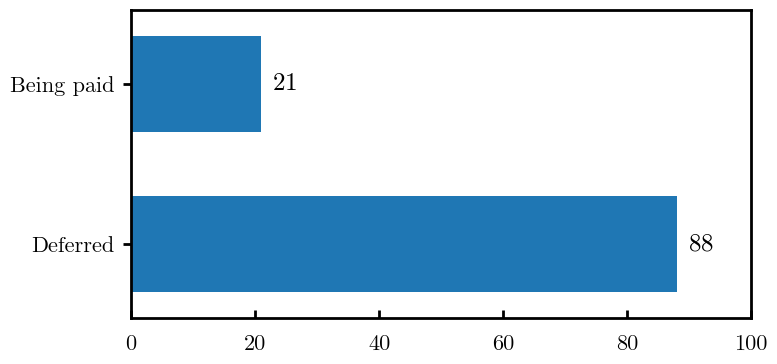

In [22]:
# Loans payments
data = fbn.count_single_choice(fbn.qlist[12])
data_al = Census.alias_labels(data, als={'They are deferred': 'Deferred', 'I am currently paying': 'Being paid'})

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,100)
plt.margins(y=0.10)
tjy.ticks()

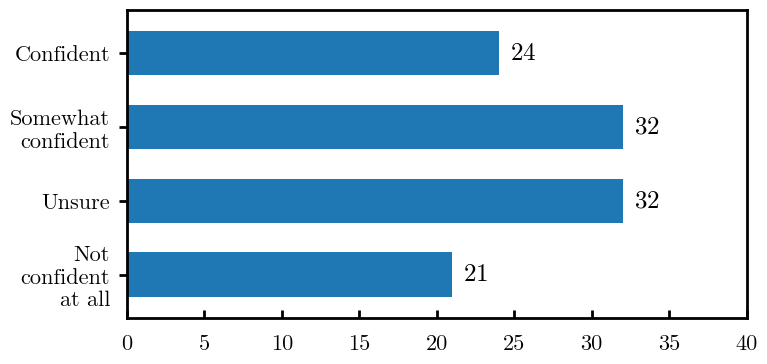

In [23]:
# Repayment confidence
data = fbn.count_single_choice(fbn.qlist[13])
data_al = Census.alias_labels(data, als={'Somewhat confident':'Somewhat\nconfident', 'Not confident at all':'Not\nconfident\nat all'})
data_al = data_al.reindex([0,2,3,1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,40)
plt.margins(y=0.08)
tjy.ticks()

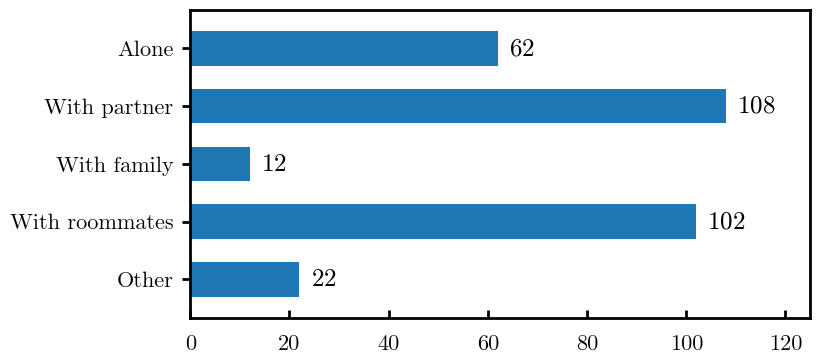

In [24]:
# Housing
data = fbn.count_single_choice(fbn.qlist[14])
data_al = Census.alias_labels(data, 
              als={'Live alone': 'Alone', 'Live with family': 'With family', 
                   'Live with roommates':'With roommates', 'Live with a partner/spouse/significant other':'With partner',
                   'Other (dorm-style, co-op)':'Other'})

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,125)
plt.margins(y=0.08)
tjy.ticks()

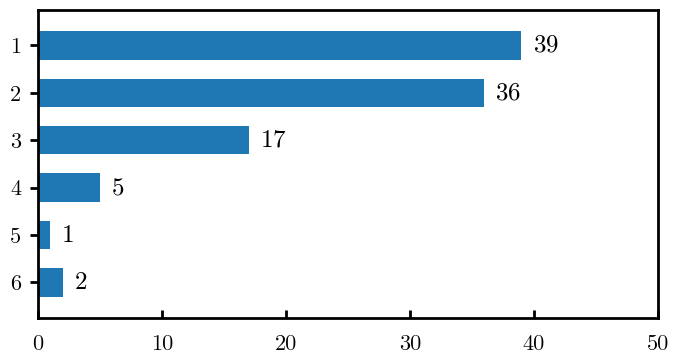

In [25]:
# Number roommates
data = fbn.count_single_choice(fbn.qlist[15])

# Manual adjustments
data.iloc[2,1] += 1
data.iloc[4,1] += 1
data = data[data.iloc[:,0]!='3 not including me']
data = data[data.iloc[:,0]!='4 housemates']

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0, 50)
plt.margins(y=0.08)
tjy.ticks()

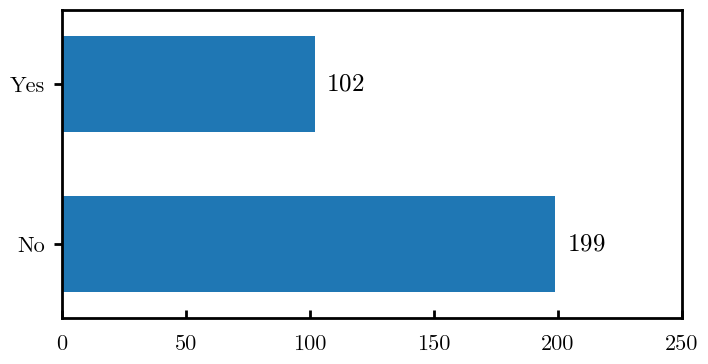

In [26]:
# Outside job
data = fbn.count_single_choice(fbn.qlist[16])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels, data.counts, height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,250)
plt.margins(y=0.10)
tjy.ticks()

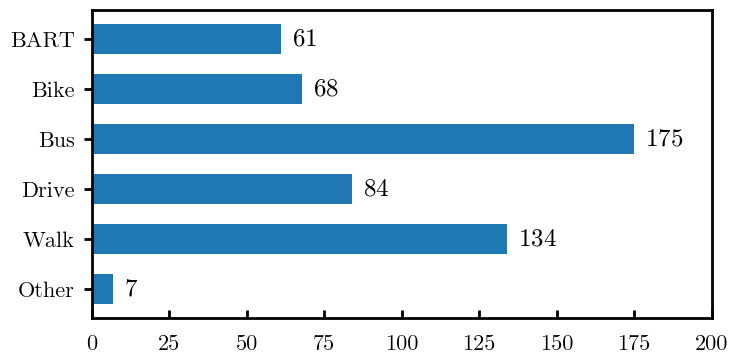

In [27]:
# Transportation to campus
data = fbn.count_multi_choice(fbn.qlist[17])
data = Census.move_to_bot(data, data.iloc[:,0]=='Other')

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,200)
plt.margins(y=0.05)
tjy.ticks()

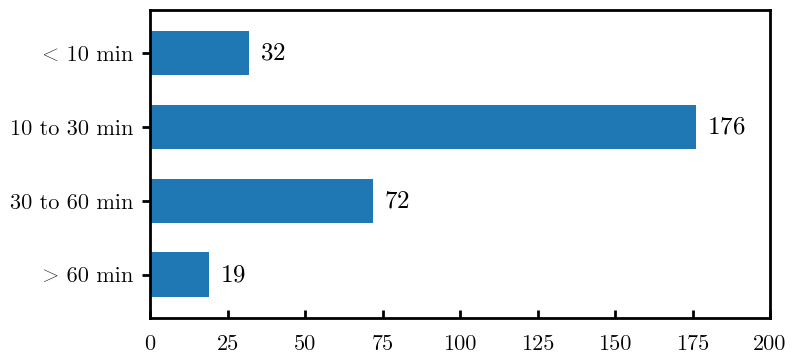

In [28]:
# Commute time
data = fbn.count_single_choice(fbn.qlist[18])
data_al = Census.alias_labels(data, 
            als={'10 to 30 minutes': '10 to 30 min', '30 minutes to 1 hour': '30 to 60 min', 
                'Less than 10 minutes': '< 10 min', 'More than 1 hour': '> 60 min'})
data_al = data_al.reindex([2,0,1,3])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0, 200)
plt.margins(y=0.08)
tjy.ticks()

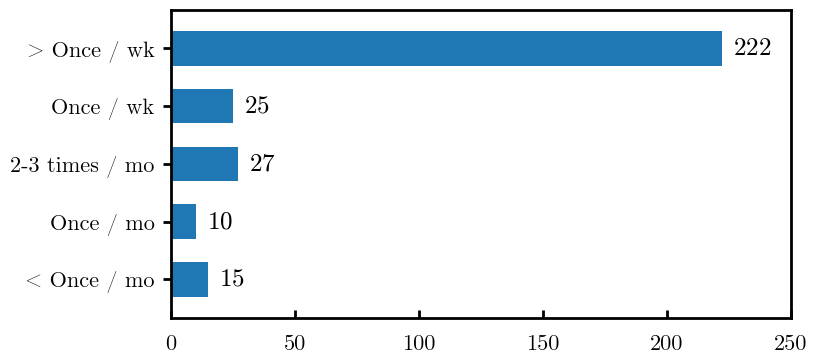

In [29]:
# How often BayPass
data = fbn.count_single_choice(fbn.qlist[19])
data_al = Census.alias_labels(data, 
            als={'Multiple times per week': '> Once / wk', '1 time a week': 'Once / wk',
                '2-3 times per month': '2-3 times / mo', '1 time per month': 'Once / mo', 'Less than 1 time per month': '< Once / mo'})
data_al = data_al.reindex([4,0,2,1,3])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0, 250)
plt.margins(y=0.08)
tjy.ticks()

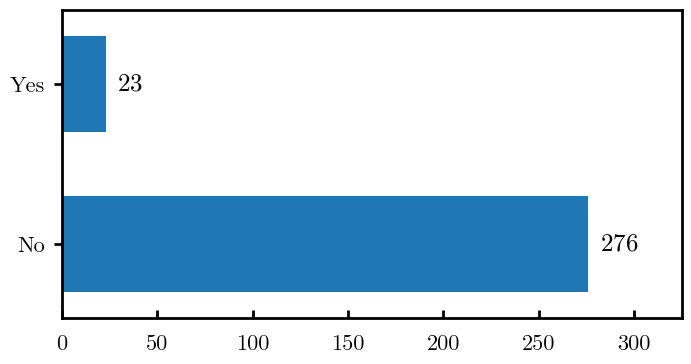

In [30]:
# Dependents
data = fbn.count_single_choice(fbn.qlist[20])
data = data.reindex([1,0])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,325)
plt.margins(y=0.10)
tjy.ticks()

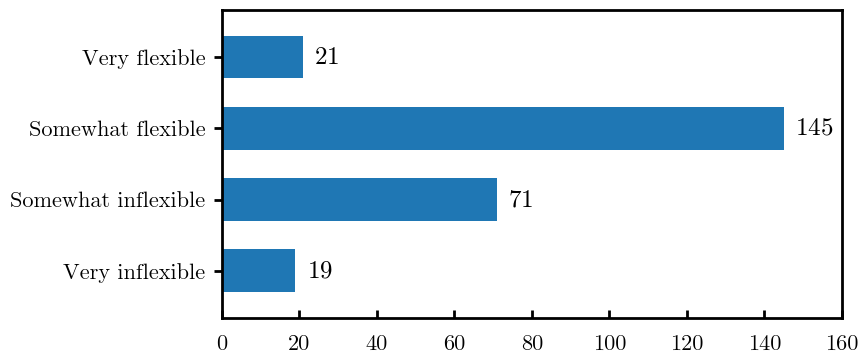

In [31]:
# Feel dept w/ dependents
data = fbn.count_single_choice(fbn.qlist[21], sort=False)
data = data.reindex([1, 0, 2, 3])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,160)
plt.margins(y=0.10)
tjy.ticks()

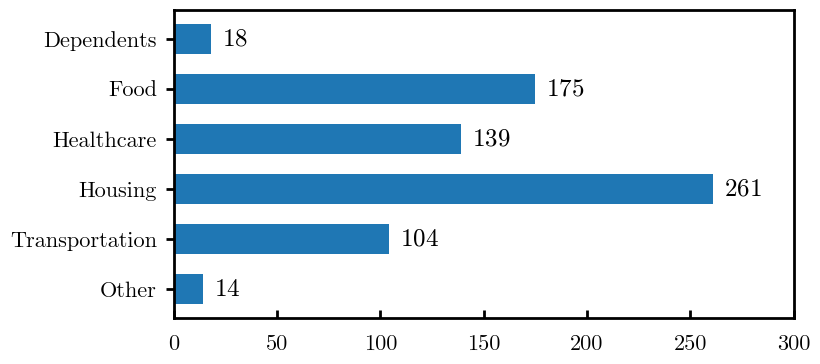

In [32]:
# Area of financial need
data = fbn.count_multi_choice(fbn.qlist[22])
data = Census.move_to_bot(data, data.iloc[:,0]=='Other')
data_al = Census.alias_labels(data, als={'Caring for dependents':'Dependents'})

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,300)
plt.margins(y=0.05)
tjy.ticks()

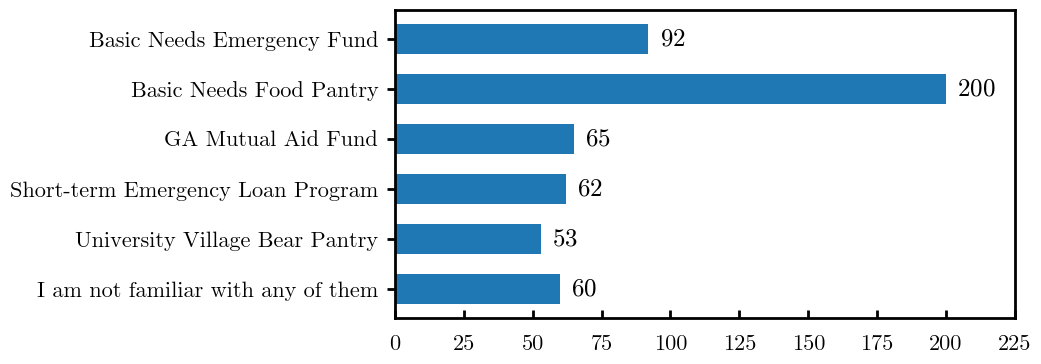

In [33]:
# Familiar resources
data = fbn.count_multi_choice(fbn.qlist[23])
data = Census.move_to_bot(data, data.iloc[:,0]=='I am not familiar with any of them')

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,225)
plt.margins(y=0.05)
tjy.ticks()

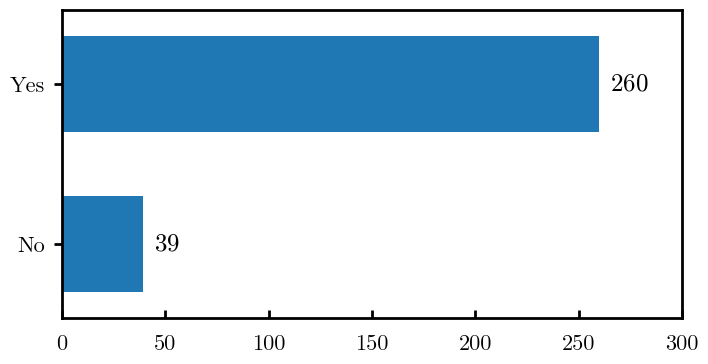

In [34]:
# Funding cut anxiety
data = fbn.count_single_choice(fbn.qlist[24], sort=False)

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,300)
plt.margins(y=0.10)
tjy.ticks()

In [35]:
# Open response
data = fbn.data_df[fbn.qlist[25]]
# [i for i in data[data.notna()]] # Uncomment to print

# Life + Wellness

In [36]:
lf = gacen.section((36,49), gacen.data_df)
lf.show_qlist()

Initialization completed.
Data recorded
	from column BB: 
		"How has your mental health been affected by being a graduate student?"
	to column BN: 
		"If you would like to provide more information on your life + wellness, please do so here."
362 responses.
13 questions asked.
	1. How has your mental health been affected by being a graduate student?
 	2. How helpful were resources provided by CAPS for improving your mental health?
 	3. How helpful were off-campus services and resources for improving your mental wellness?
 	4. How has your quality of sleep been affected by being a graduated student?
 	5. How often do you engage in physical activity?
 	6. Do you eat breakfast, lunch and dinner daily?
 	7. Do you feel that you have strong social relationships that you can rely on and engage in regularly?
 	8. On a scale from 1-10, rate your comfort going to each of these resources for support? - Confidential campus resources (e.g., Ombuds, Path to Care, CAPS)
 	9. On a scale from 1-10, rat

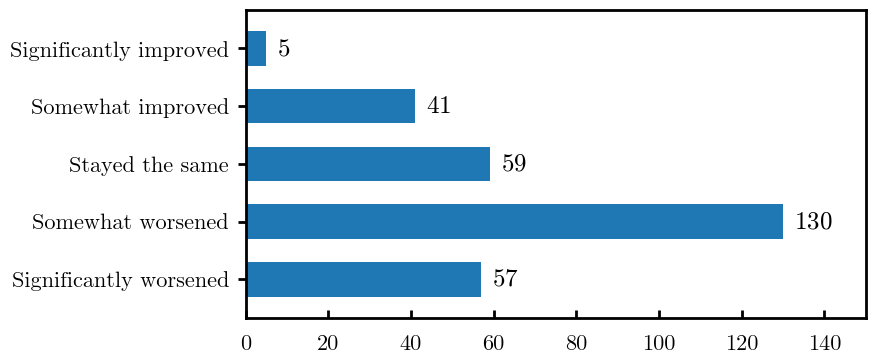

In [37]:
# Mental health
data = lf.count_single_choice(lf.qlist[0])
data = data.reindex([0,2,4,3,1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,150)
plt.margins(y=0.08)
tjy.ticks()

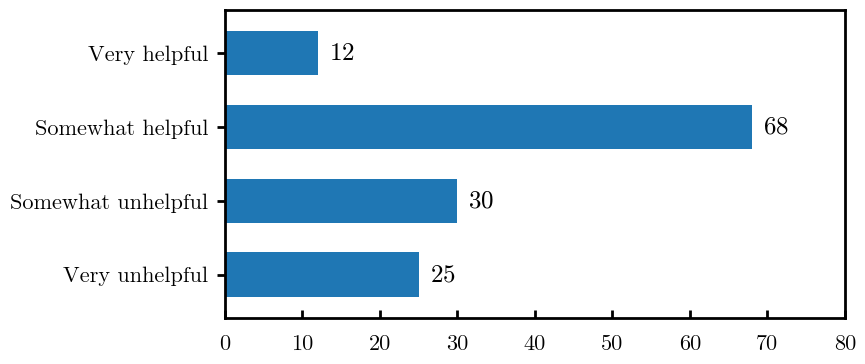

In [38]:
# CAPS
data = lf.count_single_choice(lf.qlist[1])
data = data.reindex([2,0,1,3])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0, 80)
plt.margins(y=0.08)
tjy.ticks()

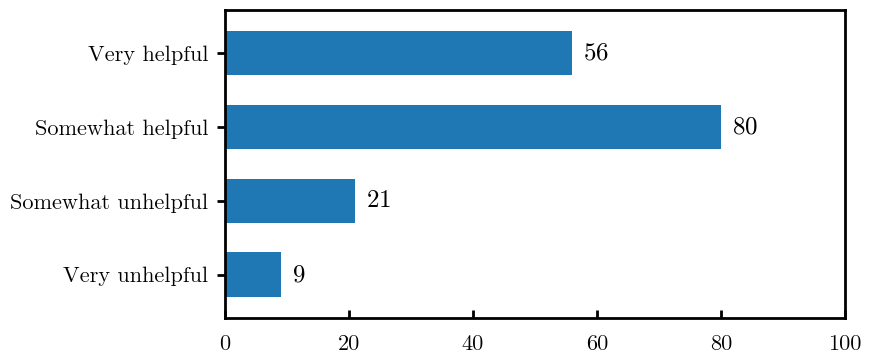

In [39]:
# Off-campus
data = lf.count_single_choice(lf.qlist[2])
data = data.reindex([2,0,1,3])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,100)
plt.margins(y=0.08)
tjy.ticks()

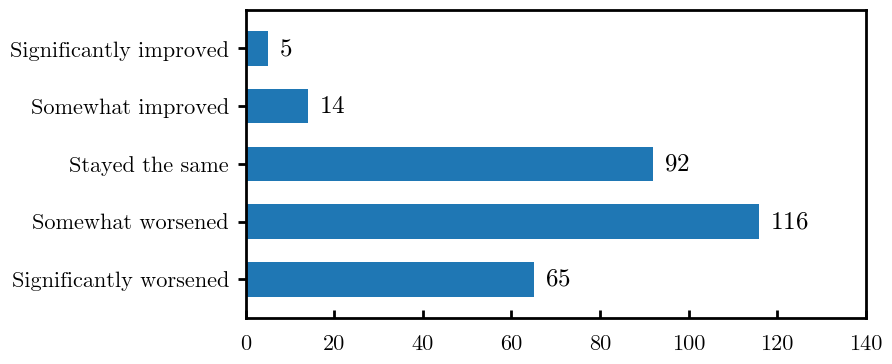

In [40]:
# Sleep
data = lf.count_single_choice(lf.qlist[3])
data = data.reindex([0,2,4,3,1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,140)
plt.margins(y=0.08)
tjy.ticks()

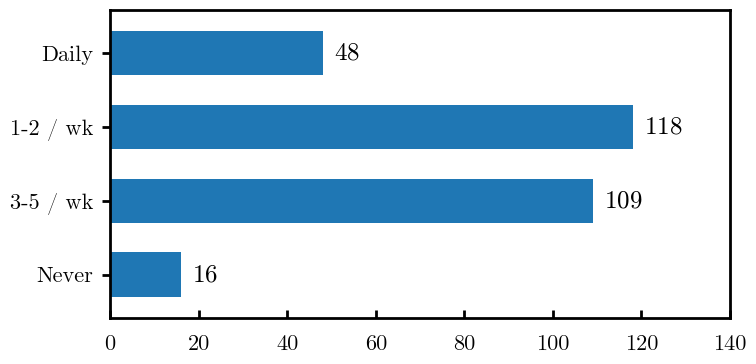

In [41]:
# Physical activity
data = lf.count_single_choice(lf.qlist[4])
data_al = Census.alias_labels(data, als={'1-2 times a week':'1-2 / wk', '3-5 times a week': '3-5 / wk'})
data_al = data_al.reindex([2,0,1,3])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,140)
plt.margins(y=0.08)
tjy.ticks()

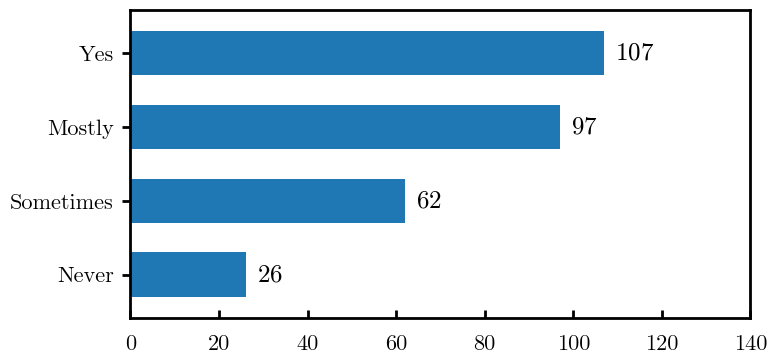

In [42]:
# Eating
data = lf.count_single_choice(lf.qlist[5])
data_al = Census.alias_labels(data, als={'Most of the time':'Mostly'})
data_al = data_al.reindex([3,0,2,1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,140)
plt.margins(y=0.08)
tjy.ticks()

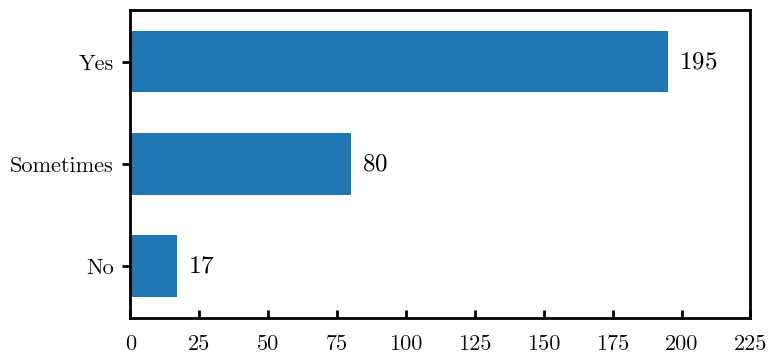

In [43]:
# Social
data = lf.count_single_choice(lf.qlist[6])
data_al = Census.alias_labels(data, als={'Most of the time':'Mostly'})
# data_al = data_al.reindex([3,0,2,1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias, data_al.counts, height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,225)
plt.margins(y=0.08)
tjy.ticks()

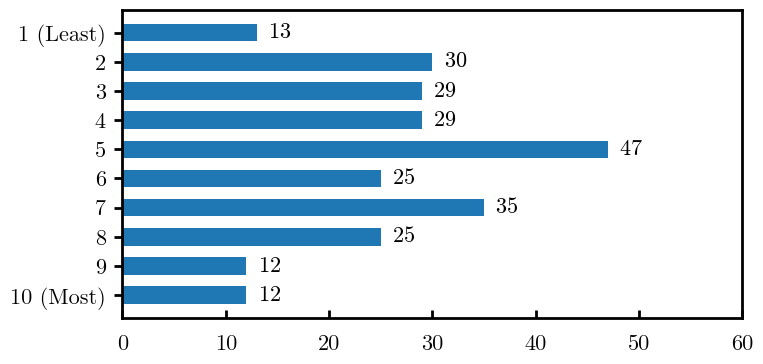

In [44]:
# Confidential resources
data = lf.count_single_choice(lf.qlist[7])
data_al = Census.alias_labels(data, als={'1': '1 (Least)', '10': '10 (Most)'})
data_al = Census.move_to_bot(data_al, data.iloc[:,0]=='10')

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=16, fmt=r'$%d$')
ax.set_xlim(0, 60)
plt.margins(y=0.05)
tjy.ticks()

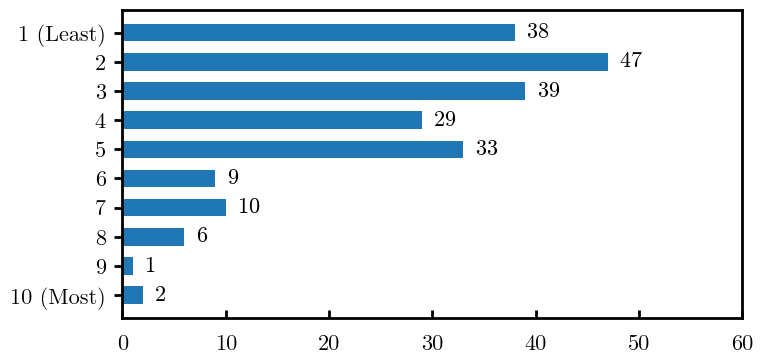

In [45]:
# Non-confidential resources
data = lf.count_single_choice(lf.qlist[8])
data_al = Census.alias_labels(data, als={'1': '1 (Least)', '10': '10 (Most)'})
data_al = Census.move_to_bot(data_al, data.iloc[:,0]=='10')

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=16, fmt=r'$%d$')
ax.set_xlim(0, 60)
plt.margins(y=0.05)
tjy.ticks()

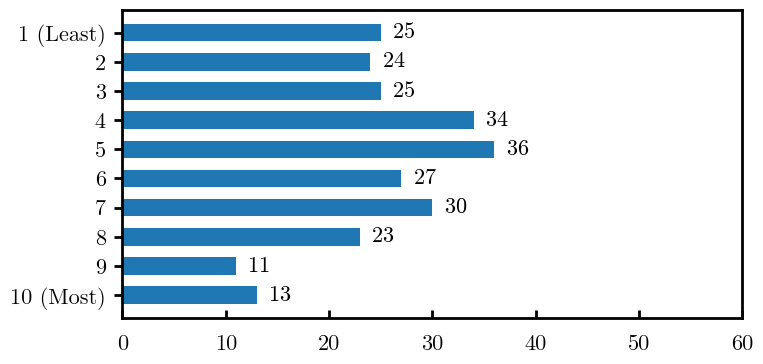

In [46]:
# College / dept admin
data = lf.count_single_choice(lf.qlist[9])
data_al = Census.alias_labels(data, als={'1': '1 (Least)', '10': '10 (Most)'})
data_al = Census.move_to_bot(data_al, data.iloc[:,0]=='10')

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=16, fmt=r'$%d$')
ax.set_xlim(0, 60)
plt.margins(y=0.05)
tjy.ticks()

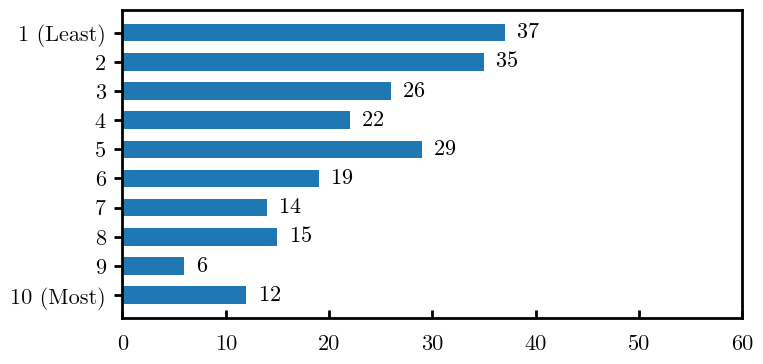

In [47]:
# GA
data = lf.count_single_choice(lf.qlist[10])
data_al = Census.alias_labels(data, als={'1': '1 (Least)', '10': '10 (Most)'})
data_al = Census.move_to_bot(data_al, data.iloc[:,0]=='10')

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=16, fmt=r'$%d$')
ax.set_xlim(0, 60)
plt.margins(y=0.05)
tjy.ticks()

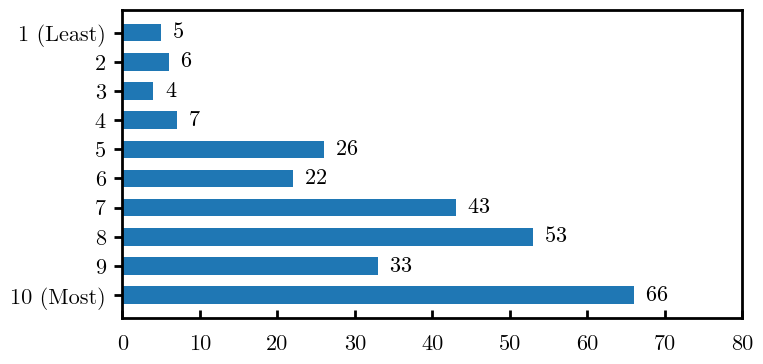

In [48]:
# Grad students
data = lf.count_single_choice(lf.qlist[11])
data_al = Census.alias_labels(data, als={'1': '1 (Least)', '10': '10 (Most)'})
data_al = Census.move_to_bot(data_al, data.iloc[:,0]=='10')

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=16, fmt=r'$%d$')
ax.set_xlim(0, 80)
plt.margins(y=0.05)
tjy.ticks()

In [49]:
# Open response
data = lf.data_df[lf.qlist[12]]
# [i for i in data[data.notna()]] # Uncomment to print

# Accessibility

In [50]:
ac = gacen.section((49,None), gacen.data_df)
ac.show_qlist()

Initialization completed.
Data recorded
	from column BO: 
		"Do you experience disability-related needs in your academic and extracurricular activities at UC Berkeley?"
	to column BS: 
		"If you would like to provide more information on accessibility, please do so here."
362 responses.
5 questions asked.
	1. Do you experience disability-related needs in your academic and extracurricular activities at UC Berkeley?
 	2. Do you experience disability-related needs in your work capacity at UC Berkeley?
 	3. Have any of your accommodation or access needs not been met by your department, the GA, or the University?
 	4. Have you interacted with DSP, DAC and/or UHS in the context of accessibility?
 	5. If you would like to provide more information on accessibility, please do so here.



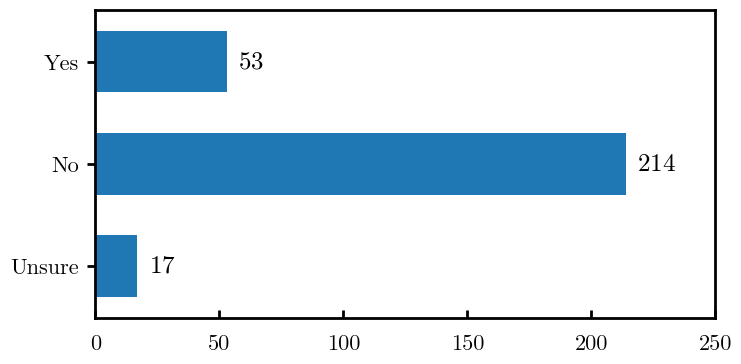

In [51]:
# Disability acadmic / extracurricular
data = ac.count_single_choice(ac.qlist[0], sort=False)
data = data.reindex([2,0,1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,250)
plt.margins(y=0.08)
tjy.ticks()

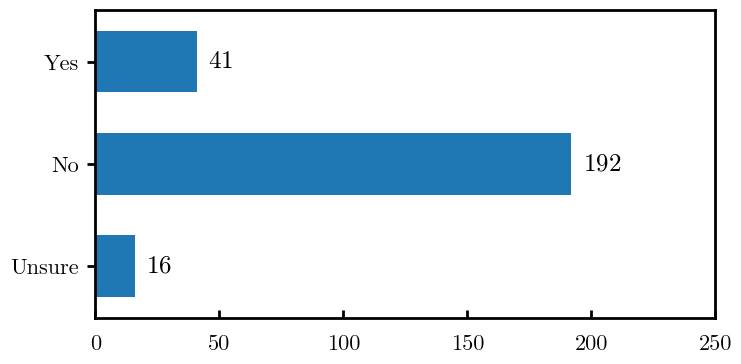

In [52]:
# Disability work
data = ac.count_single_choice(ac.qlist[1], sort=False)
data = data.reindex([2,0,1])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,250)
plt.margins(y=0.08)
tjy.ticks()

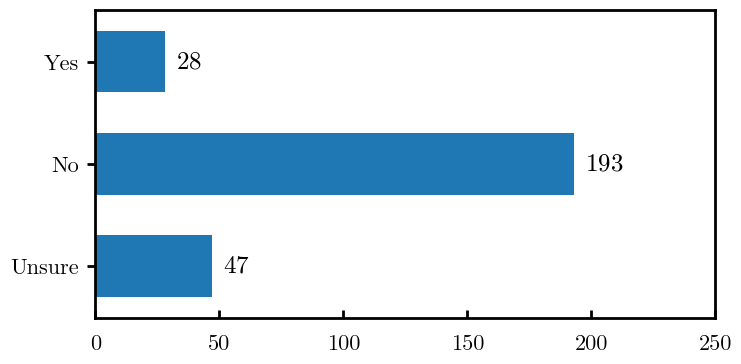

In [53]:
# Access not met
data = ac.count_single_choice(ac.qlist[2], sort=False)
data = data.reindex([1,0,2])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,250)
plt.margins(y=0.08)
tjy.ticks()

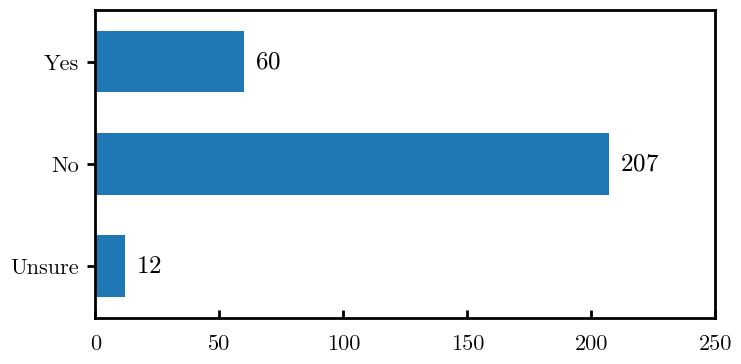

In [54]:
# Interact with campus access
data = ac.count_single_choice(ac.qlist[3], sort=False)
data = data.reindex([1,0,2])

fig, ax = plt.subplots(figsize=(8,4))
bar_container = plt.barh(data.labels[::-1], data.counts[::-1], height=0.6, align='center')
ax.bar_label(bar_container, padding=8, fontsize=18, fmt=r'$%d$')
ax.set_xlim(0,250)
plt.margins(y=0.08)
tjy.ticks()

In [55]:
# Open response
data = ac.data_df[ac.qlist[4]]
# [i for i in data[data.notna()]] # Uncomment to print